# Exploratory Data Analysis - OCR Dataset

This notebook performs comprehensive exploratory data analysis on the OCR dataset to understand:
- Dataset structure and completeness
- Text characteristics and distributions
- Character frequency and vocabulary
- Image properties and quality
- Data quality issues and recommendations

**Dataset Location:** `./2/dataset/`

## 1. Import Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## 2. Load Dataset

In [2]:
# Dataset paths
BASE_PATH = './2/dataset/'
IMG_DIR = os.path.join(BASE_PATH, 'images')
LABELS_PATH = os.path.join(BASE_PATH, 'labels.csv')

# Load labels
df = pd.read_csv(LABELS_PATH)

print(f'Dataset loaded from: {BASE_PATH}')
print(f'Total records: {len(df)}')
print(f'\nDataset shape: {df.shape}')
print(f'\nColumn names: {list(df.columns)}')

Dataset loaded from: ./2/dataset/
Total records: 20000

Dataset shape: (20000, 2)

Column names: ['file_name', 'text']


## 3. Dataset Overview

In [3]:
# Display first few rows
print('First 5 rows:')
display(df.head())

print('\n' + '='*80)
print('Dataset Info:')
print('='*80)
df.info()

print('\n' + '='*80)
print('Basic Statistics:')
print('='*80)
display(df.describe())

First 5 rows:


,file_name,text
0,block_9964.jpg,"LIST_0 ← [ 55 , 53 , 55 , 50 ]\nVAR_0 ← taille..."
1,block_2906.jpg,algorithme\n\tVAR_0 ← 12\nVAR_1 ← 19\nVAR_2 ← ...
2,block_9660.jpg,"LIST_0 ← [ 34 , 6 , 39 , 45 , 2 , 21 , 22 , 40..."
3,block_9806.jpg,"LIST_0 ← [ 55 , 53 , 52 , 51 , 51 , 56 ]\nVAR_..."
4,block_12541.jpg,"LIST_0 ← [ 298 , 277 , 241 , 206 , 277 , 104 ,..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  20000 non-null  object
 1   text       20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB

Basic Statistics:


,file_name,text
count,20000,20000
unique,20000,19861
top,block_9964.jpg,VAR_0 ← 6\nVAR_1 ← 4\nVAR_2 ← 1\nVAR_3 ← 1\nta...
freq,1,6


## 4. Data Quality Assessment

In [4]:
# Check for missing values
print('Missing Values Analysis:')
print('='*50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
display(missing_df[missing_df['Missing Count'] > 0])

# Check for empty strings
if 'text' in df.columns:
    empty_text = df['text'].fillna('').str.strip().eq('').sum()
    print(f'\nEmpty text entries: {empty_text} ({empty_text/len(df)*100:.2f}%)')

# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f'\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)')

if 'file_name' in df.columns:
    duplicate_files = df['file_name'].duplicated().sum()
    print(f'Duplicate file names: {duplicate_files}')

Missing Values Analysis:


,Missing Count,Percentage



Empty text entries: 0 (0.00%)

Duplicate rows: 0 (0.00%)
Duplicate file names: 0


## 5. Text Length Analysis

Text Length Statistics:
count    20000.000000
mean       179.740350
std         99.942957
min         49.000000
25%        121.000000
50%        155.000000
75%        219.000000
max        713.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    20000.000000
mean        51.167750
std         31.617577
min         15.000000
25%         31.000000
50%         43.000000
75%         64.000000
max        225.000000
Name: word_count, dtype: float64


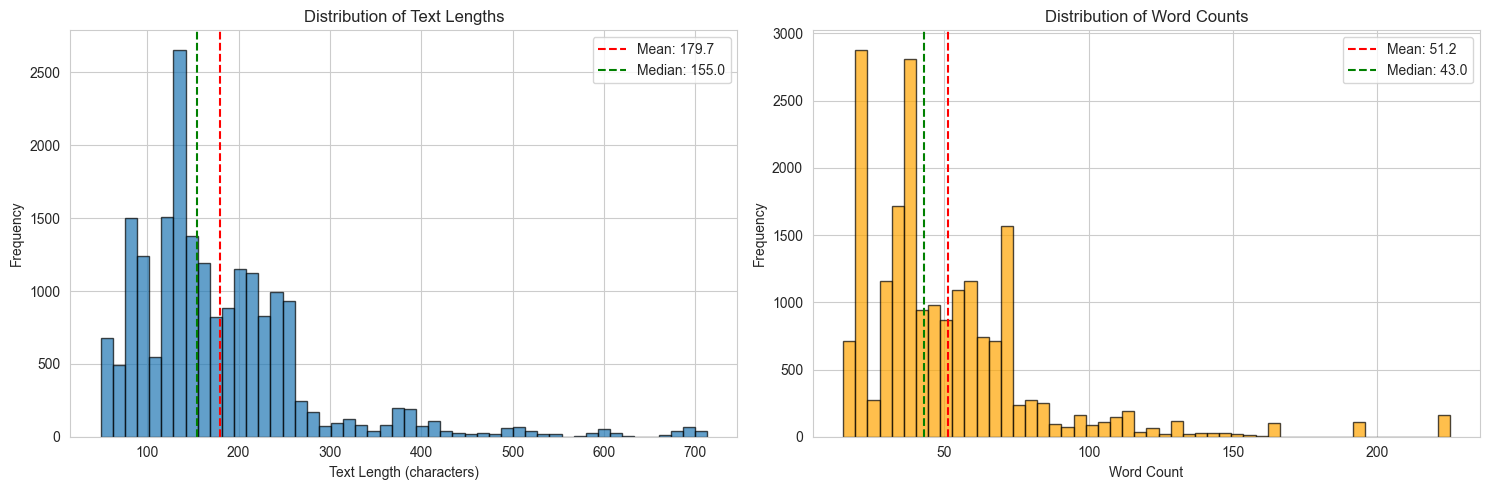

In [5]:
# Calculate text lengths
df['text_length'] = df['text'].fillna('').astype(str).str.len()
df['word_count'] = df['text'].fillna('').astype(str).str.split().str.len()

print('Text Length Statistics:')
print('='*50)
print(df['text_length'].describe())

print('\nWord Count Statistics:')
print('='*50)
print(df['word_count'].describe())

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Text length distribution
axes[0].hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Text Lengths')
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.1f}')
axes[0].axvline(df['text_length'].median(), color='green', linestyle='--', label=f'Median: {df["text_length"].median():.1f}')
axes[0].legend()

# Word count distribution
axes[1].hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Word Counts')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.1f}')
axes[1].axvline(df['word_count'].median(), color='green', linestyle='--', label=f'Median: {df["word_count"].median():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## 6. Character Frequency Analysis

Total characters in dataset: 3,594,807
Unique characters (vocabulary): 57

Character set preview (first 100): 	.
. .(.).*.+.,.-./.0.1.2.3.4.5.6.7.8.9.<.=.>.A.D.I.L.R.S.T.V.X.[.]._.a.d.e.f.g.h.i.l.m.n.o.p.q.r.s.t.u.ê.←.≠.≤.≥

Top 30 Most Frequent Characters:
  ' ' :  911,374 (25.35%)
    _ :  207,458 ( 5.77%)
    V :  137,475 ( 3.82%)
    A :  137,475 ( 3.82%)
    R :  137,475 ( 3.82%)
 '\n' :  117,389 ( 3.27%)
    0 :  115,443 ( 3.21%)
    ( :  105,889 ( 2.95%)
    ) :  105,889 ( 2.95%)
    1 :   91,744 ( 2.55%)
    , :   88,004 ( 2.45%)
    i :   78,967 ( 2.20%)
    ← :   76,334 ( 2.12%)
    I :   69,983 ( 1.95%)
    r :   59,481 ( 1.65%)
    o :   56,560 ( 1.57%)
    a :   56,417 ( 1.57%)
    n :   53,843 ( 1.50%)
    2 :   52,755 ( 1.47%)
    f :   46,967 ( 1.31%)
    3 :   44,449 ( 1.24%)
    e :   41,016 ( 1.14%)
    4 :   40,579 ( 1.13%)
 '\t' :   40,493 ( 1.13%)
    L :   40,145 ( 1.12%)
    S :   40,145 ( 1.12%)
    T :   40,145 ( 1.12%)
    5 :   39,537 ( 1.10%)
    6 :   37,5

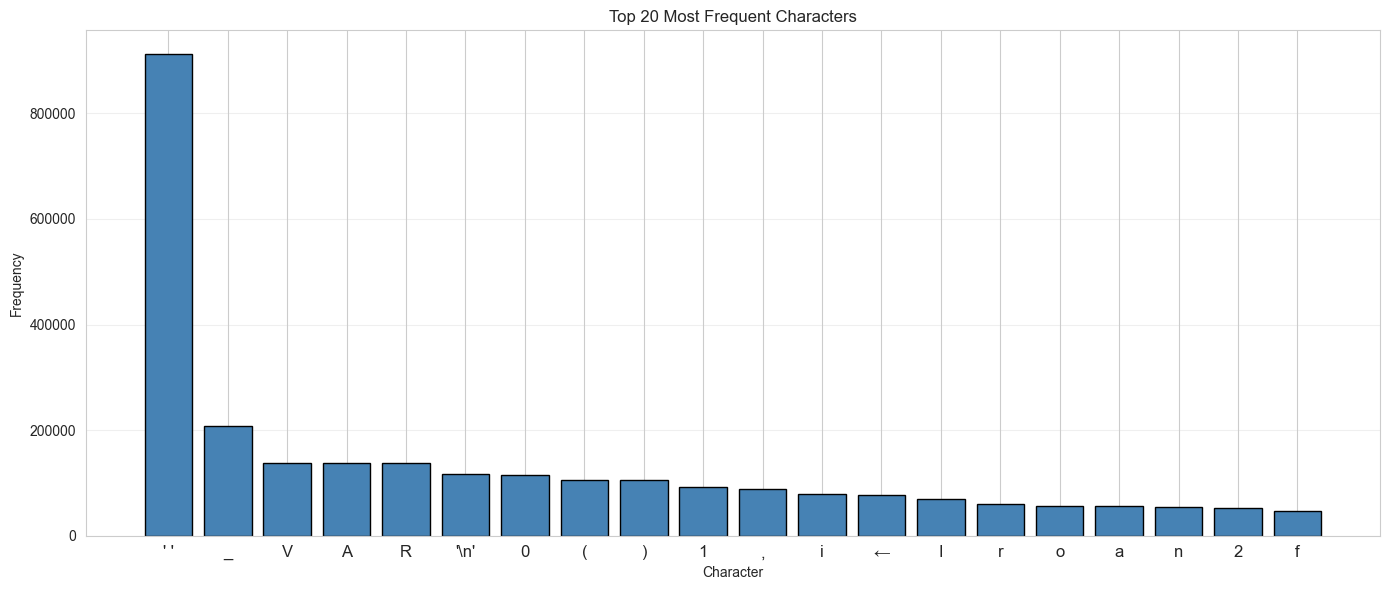

In [6]:
# Extract all characters
all_text = ''.join(df['text'].fillna('').astype(str))
char_counts = Counter(all_text)

# Get unique characters
unique_chars = sorted(set(all_text))
vocab_size = len(unique_chars)

print(f'Total characters in dataset: {len(all_text):,}')
print(f'Unique characters (vocabulary): {vocab_size}')
print(f'\nCharacter set preview (first 100): {".".join(unique_chars[:100])}')

# Most common characters
print('\nTop 30 Most Frequent Characters:')
print('='*50)
for char, count in char_counts.most_common(30):
    char_display = repr(char) if char in ['\n', '\t', ' '] else char
    percentage = (count / len(all_text)) * 100
    print(f'{char_display:>5} : {count:>8,} ({percentage:>5.2f}%)')

# Visualize top characters
top_chars = char_counts.most_common(20)
chars, counts = zip(*top_chars)
chars_display = [repr(c) if c in ['\n', '\t', ' '] else c for c in chars]

plt.figure(figsize=(14, 6))
plt.bar(range(len(chars)), counts, color='steelblue', edgecolor='black')
plt.xticks(range(len(chars)), chars_display, rotation=0, fontsize=12)
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Characters')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Image Files Analysis

In [7]:
# Check image file existence
if 'file_name' in df.columns:
    df['img_path'] = df['file_name'].apply(lambda x: os.path.join(IMG_DIR, x))
    df['exists'] = df['img_path'].apply(os.path.isfile)
    
    existing_count = df['exists'].sum()
    missing_count = (~df['exists']).sum()
    
    print('Image File Status:')
    print('='*50)
    print(f'Total images referenced: {len(df)}')
    print(f'Existing images: {existing_count} ({existing_count/len(df)*100:.2f}%)')
    print(f'Missing images: {missing_count} ({missing_count/len(df)*100:.2f}%)')
    
    if missing_count > 0:
        print('\nFirst 10 missing files:')
        print(df[~df['exists']]['file_name'].head(10).tolist())
else:
    print('No file_name column found in dataset')

Image File Status:
Total images referenced: 20000
Existing images: 20000 (100.00%)
Missing images: 0 (0.00%)


## 8. Image Dimensions Analysis

Analyzing 500 sample images...

Image Dimensions Statistics:
Width  - Min: 431, Max: 2652, Mean: 694.9, Median: 500.0
Height - Min: 123, Max: 1205, Mean: 305.1, Median: 200.0
Aspect Ratio - Min: 0.82, Max: 6.74, Mean: 2.42


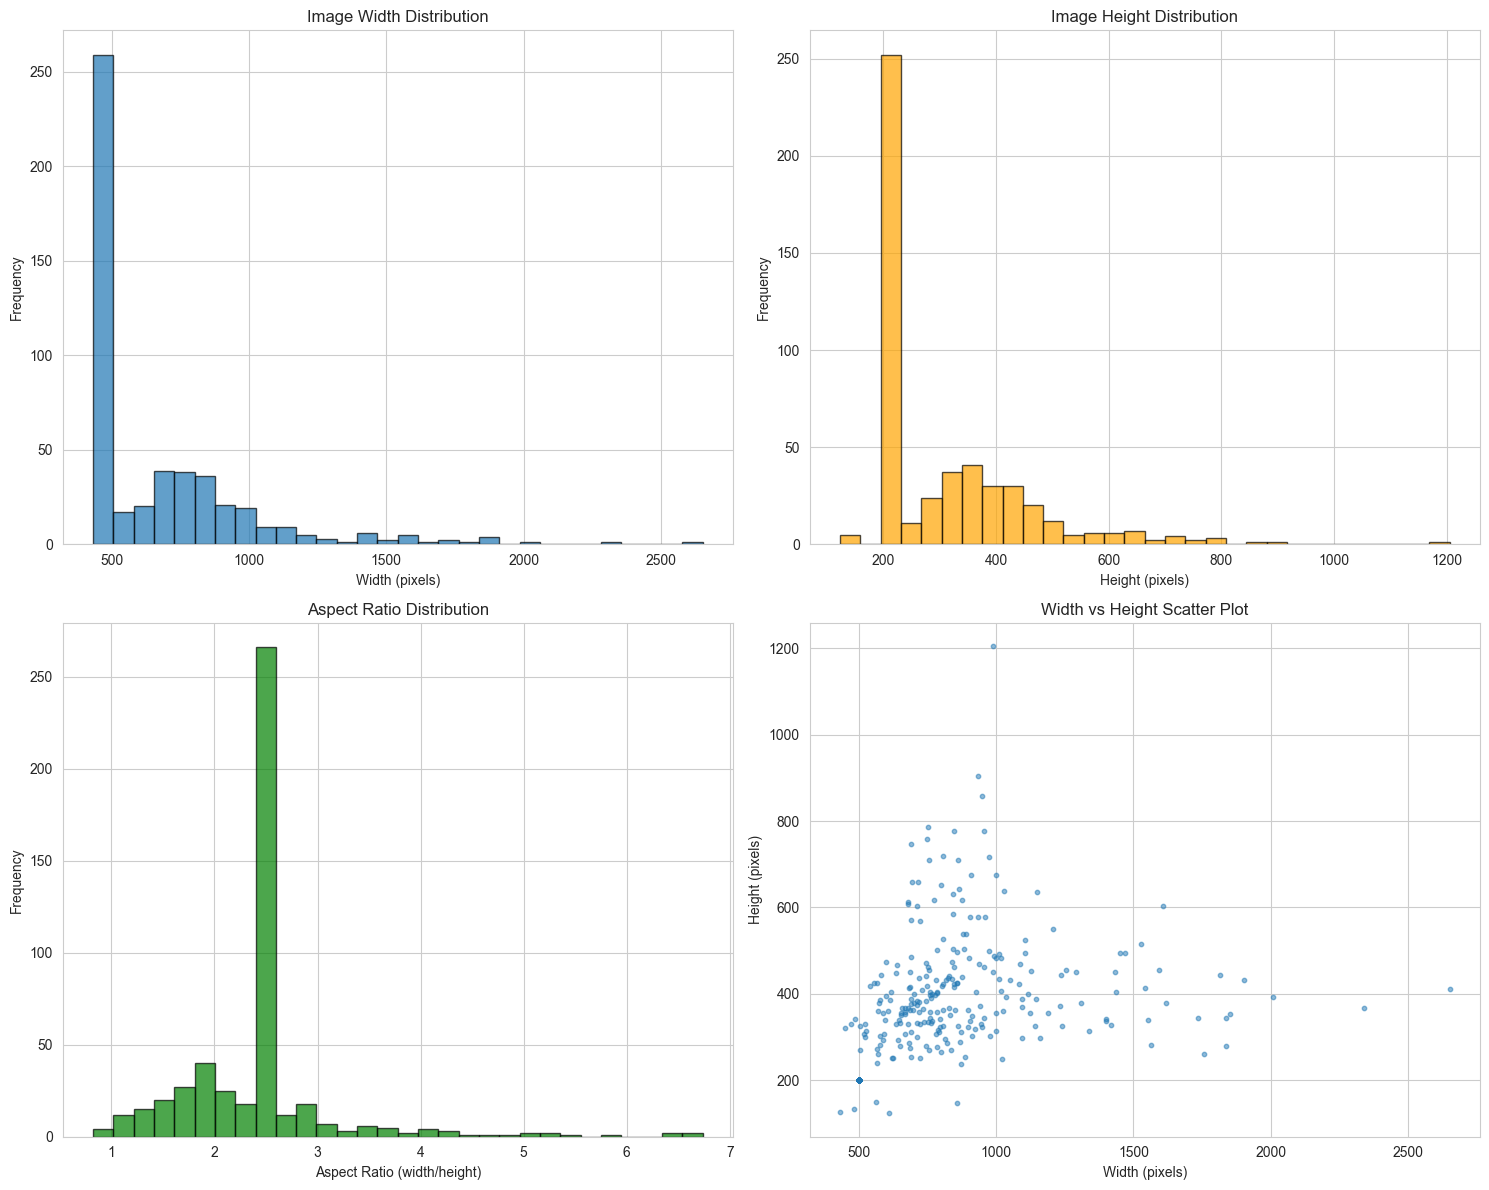

In [8]:
# Sample images to analyze dimensions (to avoid loading all images)
sample_size = min(500, df[df['exists']].shape[0])
sample_df = df[df['exists']].sample(n=sample_size, random_state=42)

widths = []
heights = []
aspect_ratios = []

print(f'Analyzing {sample_size} sample images...')

for img_path in sample_df['img_path']:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            aspect_ratios.append(width / height)
    except Exception as e:
        continue

if widths:
    print('\nImage Dimensions Statistics:')
    print('='*50)
    print(f'Width  - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}, Median: {np.median(widths):.1f}')
    print(f'Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}, Median: {np.median(heights):.1f}')
    print(f'Aspect Ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Mean: {np.mean(aspect_ratios):.2f}')
    
    # Visualize
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Width distribution
    axes[0, 0].hist(widths, bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Width (pixels)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Image Width Distribution')
    
    # Height distribution
    axes[0, 1].hist(heights, bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].set_xlabel('Height (pixels)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Image Height Distribution')
    
    # Aspect ratio distribution
    axes[1, 0].hist(aspect_ratios, bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[1, 0].set_xlabel('Aspect Ratio (width/height)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Aspect Ratio Distribution')
    
    # Scatter: width vs height
    axes[1, 1].scatter(widths, heights, alpha=0.5, s=10)
    axes[1, 1].set_xlabel('Width (pixels)')
    axes[1, 1].set_ylabel('Height (pixels)')
    axes[1, 1].set_title('Width vs Height Scatter Plot')
    
    plt.tight_layout()
    plt.show()
else:
    print('No valid images found for analysis')

## 9. Text Length vs Image Width Correlation

Correlation Analysis:
                width    height  text_length
width        1.000000  0.523612     0.484077
height       0.523612  1.000000     0.739182
text_length  0.484077  0.739182     1.000000


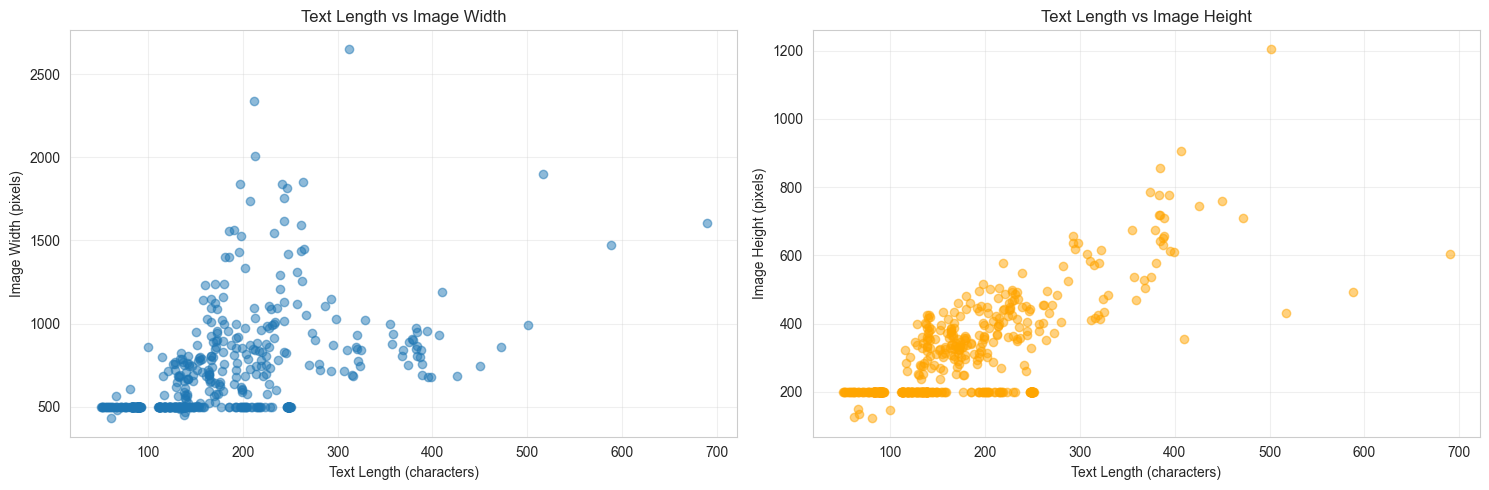

In [9]:
# Analyze correlation between text length and image dimensions
if widths and 'text_length' in sample_df.columns:
    correlation_data = pd.DataFrame({
        'width': widths[:len(sample_df)],
        'height': heights[:len(sample_df)],
        'text_length': sample_df['text_length'].values[:len(widths)]
    })
    
    print('Correlation Analysis:')
    print('='*50)
    print(correlation_data.corr())
    
    # Scatter plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].scatter(correlation_data['text_length'], correlation_data['width'], alpha=0.5)
    axes[0].set_xlabel('Text Length (characters)')
    axes[0].set_ylabel('Image Width (pixels)')
    axes[0].set_title('Text Length vs Image Width')
    axes[0].grid(alpha=0.3)
    
    axes[1].scatter(correlation_data['text_length'], correlation_data['height'], alpha=0.5, color='orange')
    axes[1].set_xlabel('Text Length (characters)')
    axes[1].set_ylabel('Image Height (pixels)')
    axes[1].set_title('Text Length vs Image Height')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 10. Sample Images Visualization

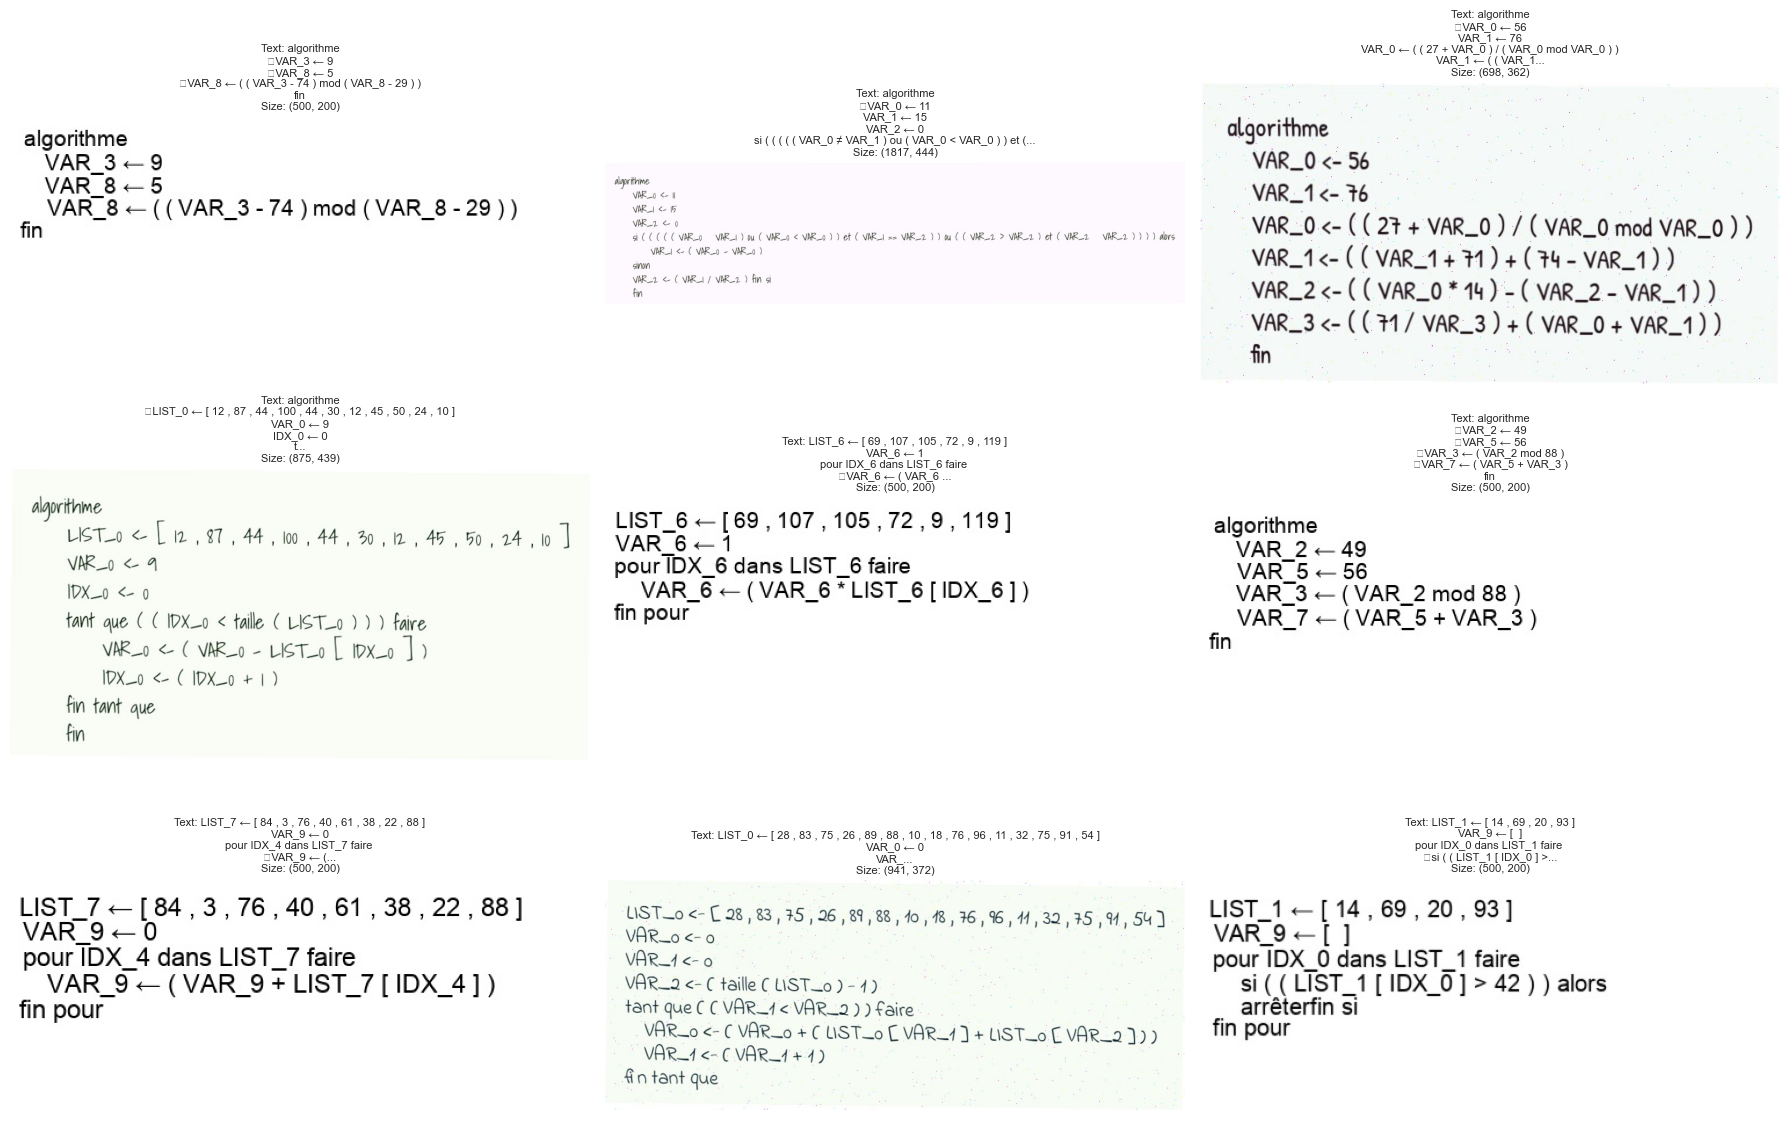

In [10]:
# Display sample images with their labels
sample_images = df[df['exists']].sample(n=min(9, df[df['exists']].shape[0]), random_state=42)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (_, row) in enumerate(sample_images.iterrows()):
    if idx >= 9:
        break
    
    try:
        img = Image.open(row['img_path'])
        axes[idx].imshow(img)
        axes[idx].axis('off')
        
        # Truncate long text for display
        text = str(row['text'])[:100]
        if len(str(row['text'])) > 100:
            text += '...'
        
        axes[idx].set_title(f'Text: {text}\nSize: {img.size}', 
                           fontsize=8, wrap=True)
    except Exception as e:
        axes[idx].text(0.5, 0.5, f'Error loading image:\n{str(e)}', 
                      ha='center', va='center')
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 11. Data Quality Recommendations

In [11]:
print('DATA QUALITY SUMMARY AND RECOMMENDATIONS')
print('='*80)

# Calculate clean dataset size
clean_df = df[
    df['text'].notna() & 
    (df['text'].str.strip() != '') & 
    df['exists']
]

print(f'\n1. Dataset Size:')
print(f'   - Total rows: {len(df)}')
print(f'   - Valid entries (non-null text + existing images): {len(clean_df)}')
print(f'   - Data loss: {len(df) - len(clean_df)} rows ({(len(df) - len(clean_df))/len(df)*100:.2f}%)')

print(f'\n2. Text Characteristics:')
print(f'   - Vocabulary size: {vocab_size} unique characters')
print(f'   - Avg text length: {df["text_length"].mean():.1f} characters')
print(f'   - Max text length: {df["text_length"].max()} characters')
print(f'   - Avg word count: {df["word_count"].mean():.1f} words')

if widths:
    print(f'\n3. Image Properties (based on sample):')
    print(f'   - Avg width: {np.mean(widths):.1f} pixels')
    print(f'   - Avg height: {np.mean(heights):.1f} pixels')
    print(f'   - Avg aspect ratio: {np.mean(aspect_ratios):.2f}')

print(f'\n4. Recommended Actions:')
recommendations = []

if missing_count > 0:
    recommendations.append(f'   - Remove or fix {missing_count} entries with missing image files')

if empty_text > 0:
    recommendations.append(f'   - Remove {empty_text} entries with empty text labels')

if duplicates > 0:
    recommendations.append(f'   - Review {duplicates} duplicate entries')

# Check for extreme text lengths
very_long = df[df['text_length'] > df['text_length'].quantile(0.95)].shape[0]
if very_long > 0:
    recommendations.append(f'   - Consider handling {very_long} entries with very long text (>95th percentile)')

very_short = df[df['text_length'] < 3].shape[0]
if very_short > 0:
    recommendations.append(f'   - Review {very_short} entries with very short text (<3 chars)')

if widths:
    width_std = np.std(widths)
    if width_std > np.mean(widths) * 0.5:
        recommendations.append(f'   - High variability in image widths detected - consider standardization')

if recommendations:
    for rec in recommendations:
        print(rec)
else:
    print('   - Dataset appears to be in good condition')

print('\n' + '='*80)

DATA QUALITY SUMMARY AND RECOMMENDATIONS

1. Dataset Size:
   - Total rows: 20000
   - Valid entries (non-null text + existing images): 20000
   - Data loss: 0 rows (0.00%)

2. Text Characteristics:
   - Vocabulary size: 57 unique characters
   - Avg text length: 179.7 characters
   - Max text length: 713 characters
   - Avg word count: 51.2 words

3. Image Properties (based on sample):
   - Avg width: 694.9 pixels
   - Avg height: 305.1 pixels
   - Avg aspect ratio: 2.42

4. Recommended Actions:
   - Consider handling 985 entries with very long text (>95th percentile)



## 12. Export Clean Dataset

In [12]:
# Optional: Save cleaned dataset
clean_output_path = os.path.join(BASE_PATH, 'labels_clean.csv')

# Create clean dataset
clean_dataset = df[
    df['text'].notna() & 
    (df['text'].str.strip() != '') & 
    df['exists'] &
    (df['text_length'] > 0)
].copy()

# Drop helper columns
clean_dataset = clean_dataset.drop(columns=['img_path', 'exists', 'text_length', 'word_count'], errors='ignore')

# Save
# clean_dataset.to_csv(clean_output_path, index=False)
# print(f'Clean dataset saved to: {clean_output_path}')
# print(f'Cleaned dataset size: {len(clean_dataset)} rows')
# print(f'Reduction: {len(df) - len(clean_dataset)} rows removed')

print('\nTo export clean dataset, uncomment the lines above')
print(f'Clean dataset would contain: {len(clean_dataset)} rows')


To export clean dataset, uncomment the lines above
Clean dataset would contain: 20000 rows


## Summary

This EDA notebook provides comprehensive insights into the OCR dataset including:
- Data completeness and quality metrics
- Text and character distribution analysis
- Image properties and dimensions
- Actionable recommendations for data cleaning

Use these insights to inform preprocessing decisions and model training strategies.